In [9]:
from src.data_processing import *
from src.phonemes_stats import *
from src.wav2vec2_models import *
from src.evaluation import *
from src.evaluation_stats import *

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

os.environ['DYLD_LIBRARY_PATH'] = '/opt/homebrew/lib'

In [10]:
# We prepare the test data
test_df = prepare_readingTest_data(test_type='FluencE')
test_df.head()

,id,dateOfTest,testParameters,parametersType,testResults,testType,experimentResults,childId,evaluationResults,day,extracted_subtype
2,79055215-1979-42D3-9B26-B9C6DD935D83,2024-04-29 06:35:43.691463+00:00,"{'duration': 80.0, 'textSelected': {'text': ""C...",experiment,{'recording': b'\x00\x00\x00\x1cftypM4A \x00\x...,readingTestFluencE,"{'experimentPhase': 'preTestPhase', 'experimen...",0ED01FB8-8212-4D4A-BE3E-D6B6E591EE4E,"{'wordsState': [{'C'est': 'Incorrect'}, {'l'hi...",2024-04-29 00:00:00+00:00,None_readingTestFluencE
13,3D4319B1-C861-4DB8-8EFF-BDB93392C1D3,2024-04-30 07:20:55.233783+00:00,"{'duration': 80.0, 'textSelected': {'text': ""C...",experiment,{'recording': b'\x00\x00\x00\x1cftypM4A \x00\x...,readingTestFluencE,"{'experimentPhase': 'preTestPhase', 'experimen...",4FBDEF1E-4305-4B18-9E04-B2D9C846FB70,"{'wordsState': [{'C'est': 'Correct'}, {'l'hist...",2024-04-30 00:00:00+00:00,None_readingTestFluencE
24,B73F92E3-A032-43FF-B027-9954267C6298,2024-04-29 06:36:05.256014+00:00,"{'duration': 80.0, 'textSelected': {'text': ""C...",experiment,{'recording': b'\x00\x00\x00\x1cftypM4A \x00\x...,readingTestFluencE,"{'experimentPhase': 'preTestPhase', 'experimen...",54CDB2A1-1B4D-4D14-A2BD-1B8B2D966202,"{'wordsState': [{'C'est': 'Correct'}, {'l'hist...",2024-04-29 00:00:00+00:00,None_readingTestFluencE
35,99EB8804-8099-428C-864B-A0E89012F3AA,2024-04-30 06:40:05.171190+00:00,"{'duration': 80.0, 'textSelected': {'text': ""C...",experiment,{'recording': b'\x00\x00\x00\x1cftypM4A \x00\x...,readingTestFluencE,"{'experimentPhase': 'preTestPhase', 'experimen...",5C5C220A-054A-4CD1-9111-A50D1DC65BC3,"{'wordsState': [{'C'est': 'Correct'}, {'l'hist...",2024-04-30 00:00:00+00:00,None_readingTestFluencE
46,8EFA264B-8CFC-4CDD-B910-F07C4FCB2B66,2024-04-30 06:39:52.608531+00:00,"{'duration': 80.0, 'textSelected': {'text': ""C...",experiment,{'recording': b'\x00\x00\x00\x1cftypM4A \x00\x...,readingTestFluencE,"{'experimentPhase': 'preTestPhase', 'experimen...",65E92E2D-77D2-486A-96A6-874F87D11B1C,"{'wordsState': [{'C'est': 'Correct'}, {'l'hist...",2024-04-30 00:00:00+00:00,None_readingTestFluencE


In [11]:
# We extract the number of different childId
print(f'Number of different childId: {len(test_df.childId.unique())}')

Number of different childId: 46


## Statistics about the phoneme repartition

In [3]:
# We extract all the test id for readingTestFluencE
tests_id = test_df[test_df['testType'] == 'readingTestFluencE']['id'].unique()

In [ ]:
# We run the wav2vec2-french-phonemizer model on all the readingTestFluencE tests
top_3_phoneme_transcriptions_with_proba(
    folder_path='wav_files/readingTestFluencE', 
    test_type='readingTestFluencE', 
    output_folder='transcriptions/readingTestFluencE/wav2vec2-french-phonemizer', 
    tests_id=tests_id,
    model_id='Cnam-LMSSC/wav2vec2-french-phonemizer'
    )

In [5]:
# # We run the phonemizer-wav2vec2-ctc-french model on all the readingTestFluencE tests
# top_3_phoneme_transcriptions_with_proba(
#     folder_path='wav_files/readingTestFluencE', 
#     test_type='readingTestFluencE', 
#     output_folder='transcriptions/readingTestFluencE/phonemizer-wav2vec2-ctc-french', 
#     tests_id=tests_id,
#     model_id='bofenghuang/phonemizer-wav2vec2-ctc-french'
# )

In [6]:
# # We run the wav2vec2-Phoneme model on all the readingTestFluencE tests
# top_3_phoneme_transcriptions_with_proba(
#     folder_path='wav_files/readingTestFluencE', 
#     test_type='readingTestFluencE', 
#     output_folder='transcriptions/readingTestFluencE/wav2vec2-Phoneme', 
#     tests_id=tests_id,
#     model_id='Bluecast/wav2vec2-Phoneme'
# )

In [4]:
# Paths to the three models
models = {
    "wav2vec2-french-phonemizer": "transcriptions/readingTestFluencE/wav2vec2-french-phonemizer",
    "phonemizer-wav2vec2-ctc-french": "transcriptions/readingTestFluencE/phonemizer-wav2vec2-ctc-french",
}

In [5]:
# Collect statistics
all_stats = {}
for model_name, folder in models.items():
    phoneme_stats, top1_probs = analyze_phoneme_statistics(folder)
    all_stats[model_name] = {"phoneme_stats": phoneme_stats, "top1_probs": top1_probs}

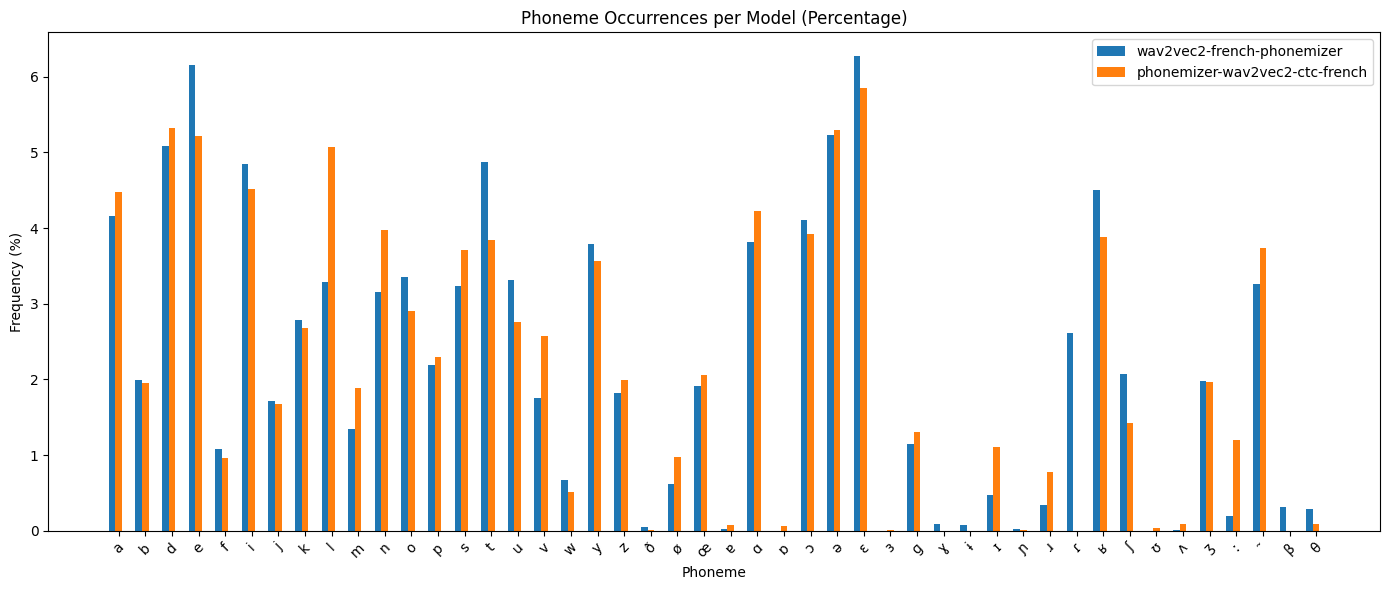

In [7]:
# ===== Plot 1: Phoneme frequency comparison (percentages) =====
all_phonemes = sorted(set(p for stats in all_stats.values() for p in stats["phoneme_stats"]))
x = range(len(all_phonemes))
width = 0.25

plt.figure(figsize=(14, 6))

for i, (model_name, stats) in enumerate(all_stats.items()):
    phoneme_stats = stats["phoneme_stats"]
    total_count = sum(p["count"] for p in phoneme_stats.values())  # sum of all counts for this model
    
    # Compute percentages for each phoneme
    percentages = [
        (phoneme_stats.get(p, {}).get("count", 0) / total_count) * 100 if total_count > 0 else 0
        for p in all_phonemes
    ]
    
    plt.bar([xi + i * width for xi in x], percentages, width=width, label=model_name)

plt.xticks([xi + width for xi in x], all_phonemes, rotation=45)
plt.xlabel("Phoneme")
plt.ylabel("Frequency (%)")
plt.title("Phoneme Occurrences per Model (Percentage)")
plt.legend()
plt.tight_layout()
plt.show()


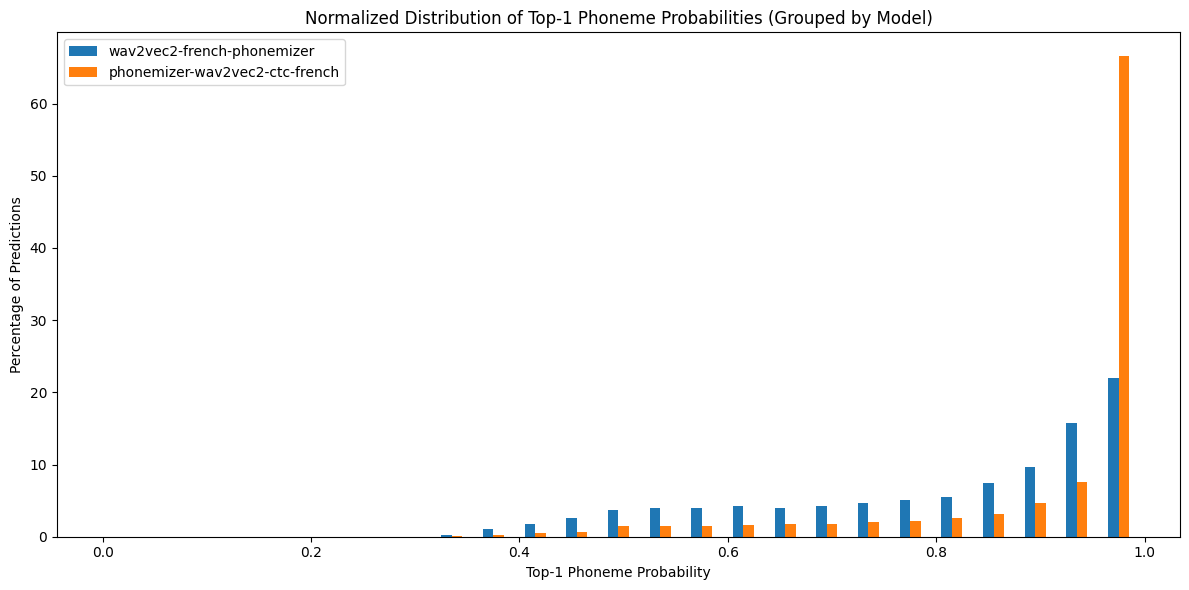

In [8]:
# ===== Plot 2: Normalized top-1 probability histograms with offset bars =====
plt.figure(figsize=(12, 6))

# Shared bin edges and width
bins = np.linspace(0, 1, 26)  # 25 bins
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_width = bins[1] - bins[0]
bar_width = bin_width / 4  # narrower bars for visual clarity

model_names = list(all_stats.keys())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # consistent color scheme

# Compute and plot histograms
for i, model_name in enumerate(model_names):
    top1_probs = all_stats[model_name]["top1_probs"]
    hist, _ = np.histogram(top1_probs, bins=bins, density=False)
    total = sum(hist)
    percentages = (hist / total * 100) if total > 0 else np.zeros_like(hist)

    # Offset each model's bars within the bin
    x_positions = bin_centers + (i - 1) * bar_width
    plt.bar(x_positions, percentages, width=bar_width, label=model_name, color=colors[i])

plt.xlabel("Top-1 Phoneme Probability")
plt.ylabel("Percentage of Predictions")
plt.title("Normalized Distribution of Top-1 Phoneme Probabilities (Grouped by Model)")
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
all_diversity = {}
all_top1_counts = {}

for model_name, folder in models.items():
    diversity, top1_counts = analyze_phoneme_diversity_and_top1(folder)
    all_diversity[model_name] = diversity
    all_top1_counts[model_name] = top1_counts

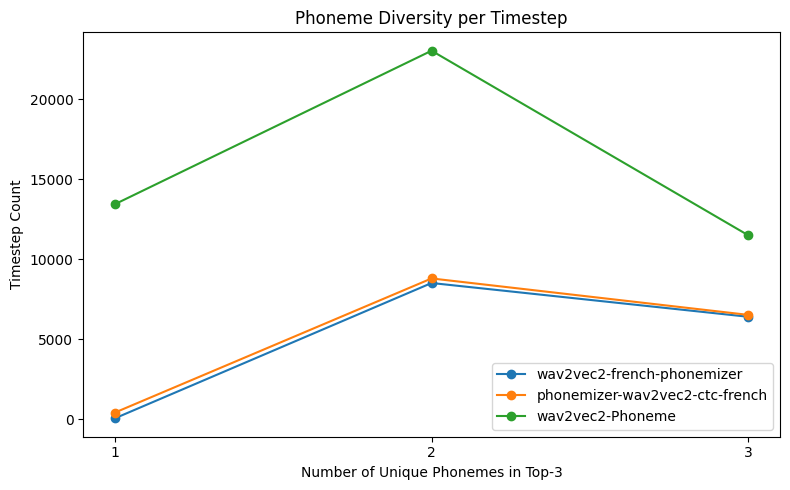

In [12]:
# === Plot 3: Per-Timestep Diversity ===
plt.figure(figsize=(8, 5))

for model_name, diversity in all_diversity.items():
    x = sorted(diversity)
    y = [diversity[i] for i in x]
    plt.plot(x, y, marker='o', label=model_name)

plt.xlabel("Number of Unique Phonemes in Top-3")
plt.ylabel("Timestep Count")
plt.title("Phoneme Diversity per Timestep")
plt.legend()
plt.xticks([1, 2, 3])
plt.tight_layout()
plt.show()

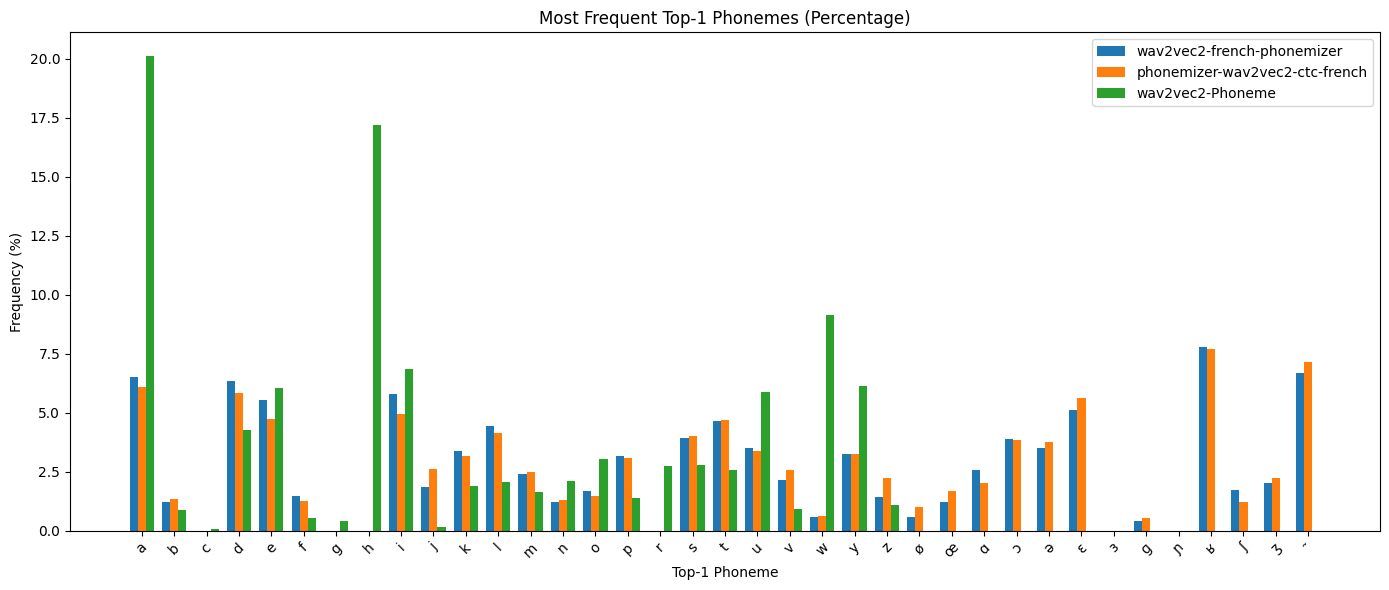

In [13]:
# === Plot 4: Top-1 Phoneme Frequency in Percentages ===
# Get union of all top-1 phonemes
all_top1_phonemes = sorted(set(p for counts in all_top1_counts.values() for p in counts))

plt.figure(figsize=(14, 6))
width = 0.25
x = range(len(all_top1_phonemes))

for i, (model_name, counts) in enumerate(all_top1_counts.items()):
    total = sum(counts.values())
    freqs = [counts.get(p, 0) / total * 100 for p in all_top1_phonemes]
    offset = [xi + i * width for xi in x]
    plt.bar(offset, freqs, width=width, label=model_name)

plt.xticks([xi + width for xi in x], all_top1_phonemes, rotation=45)
plt.xlabel("Top-1 Phoneme")
plt.ylabel("Frequency (%)")
plt.title("Most Frequent Top-1 Phonemes (Percentage)")
plt.legend()
plt.tight_layout()
plt.show()

## Statistics about the evaluation results 

### Grid search to extract the best thresholds for correct and incorrect evaluations

In [14]:
# We initialize an empty DataFrame to accumulate all evaluation results
all_eval_df = pd.DataFrame()

# We run the evaluation algorithm on the three models
for model in models:
    eval_df = grid_search_evaluation(test_df=test_df, model=model, test_type='readingTestFluencE')
    print(eval_df.head())
    all_eval_df = pd.concat([all_eval_df, eval_df], ignore_index=True)

# We compute the total error (false pos + false neg) for each row
all_eval_df['total_error'] = all_eval_df['false_pos'] + all_eval_df['false_neg']

                                test_id                       model  \
0  79055215-1979-42D3-9B26-B9C6DD935D83  wav2vec2-french-phonemizer   
1  3D4319B1-C861-4DB8-8EFF-BDB93392C1D3  wav2vec2-french-phonemizer   
2  B73F92E3-A032-43FF-B027-9954267C6298  wav2vec2-french-phonemizer   
3  99EB8804-8099-428C-864B-A0E89012F3AA  wav2vec2-french-phonemizer   
4  8EFA264B-8CFC-4CDD-B910-F07C4FCB2B66  wav2vec2-french-phonemizer   

   correct_threshold  incorrect_threshold false_pos false_neg  \
0               0.05                  0.5         2         7   
1               0.05                  0.5         1         6   
2               0.05                  0.5         0        13   
3               0.05                  0.5         1         6   
4               0.05                  0.5         3        11   

                                        word_results  
0  [(sɛ, correct, 88), (listwaʁ, uncertain_incorr...  
1  [(sɛ, incorrect, None), (listwaʁ, uncertain_in...  
2  [(sɛ, uncertai

In [15]:
all_eval_df.head()

,test_id,model,correct_threshold,incorrect_threshold,false_pos,false_neg,word_results,total_error
0,79055215-1979-42D3-9B26-B9C6DD935D83,wav2vec2-french-phonemizer,0.05,0.5,2,7,"[(sɛ, correct, 88), (listwaʁ, uncertain_incorr...",9
1,3D4319B1-C861-4DB8-8EFF-BDB93392C1D3,wav2vec2-french-phonemizer,0.05,0.5,1,6,"[(sɛ, incorrect, None), (listwaʁ, uncertain_in...",7
2,B73F92E3-A032-43FF-B027-9954267C6298,wav2vec2-french-phonemizer,0.05,0.5,0,13,"[(sɛ, uncertain_incorrect, 323), (listwaʁ, unc...",13
3,99EB8804-8099-428C-864B-A0E89012F3AA,wav2vec2-french-phonemizer,0.05,0.5,1,6,"[(sɛ, incorrect, None), (listwaʁ, uncertain_in...",7
4,8EFA264B-8CFC-4CDD-B910-F07C4FCB2B66,wav2vec2-french-phonemizer,0.05,0.5,3,11,"[(sɛ, uncertain_incorrect, 1587), (listwaʁ, co...",14


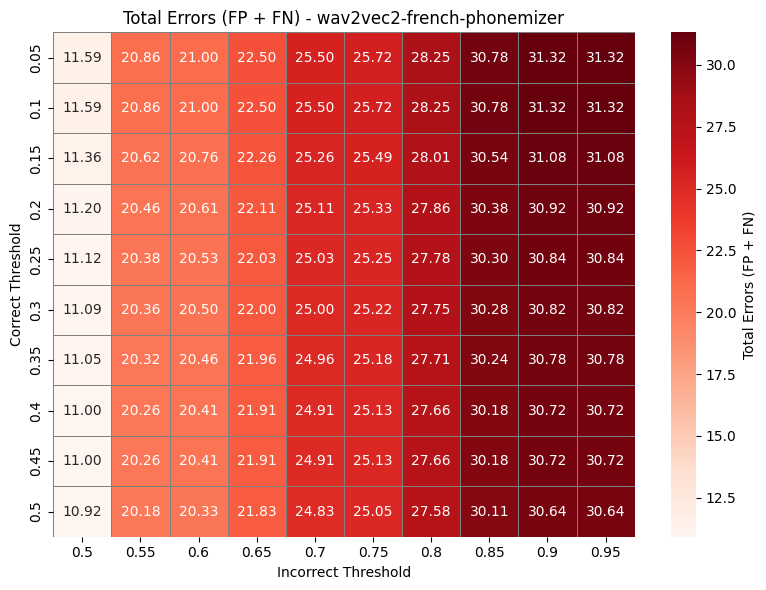

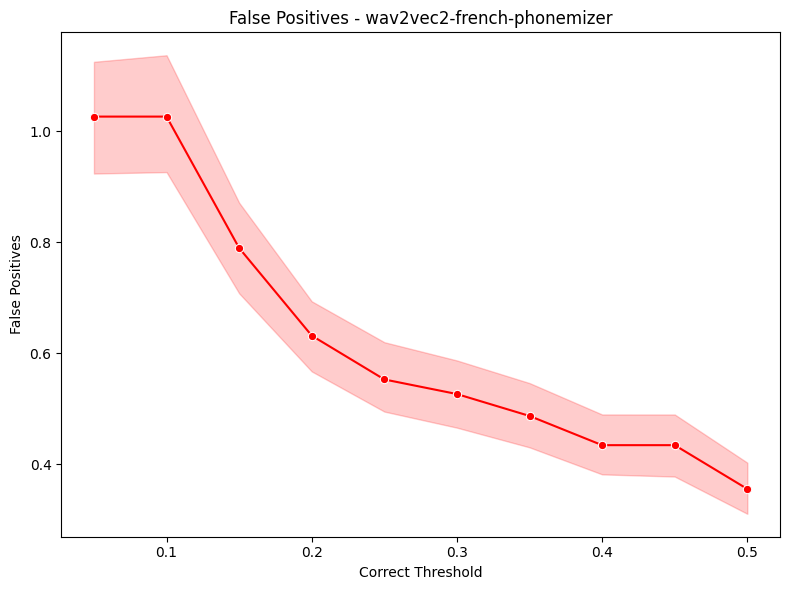

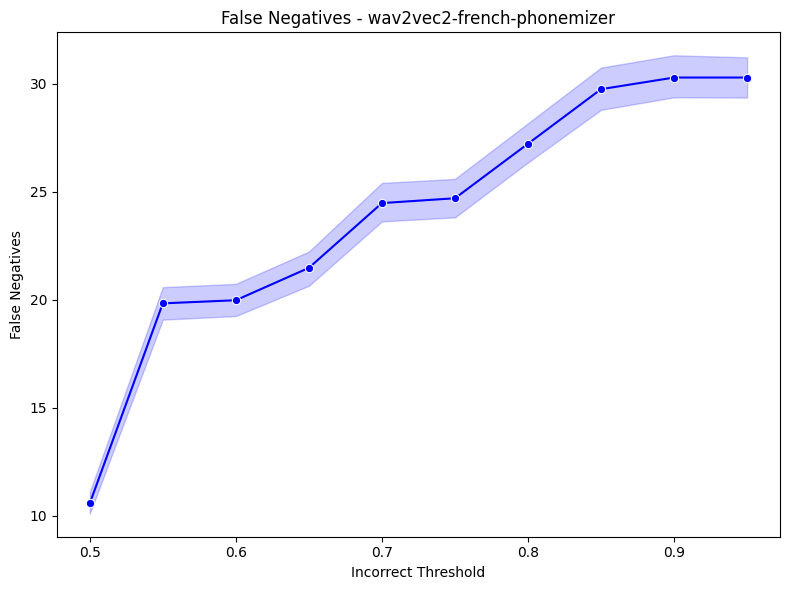

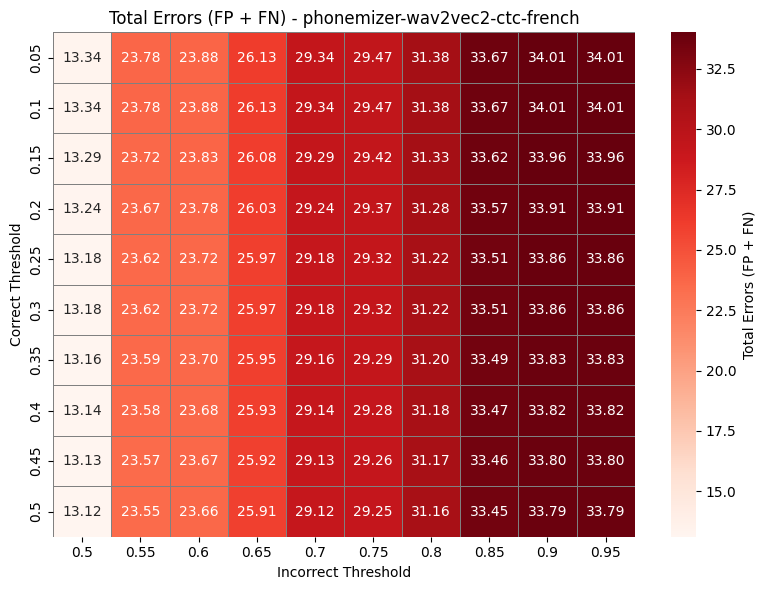

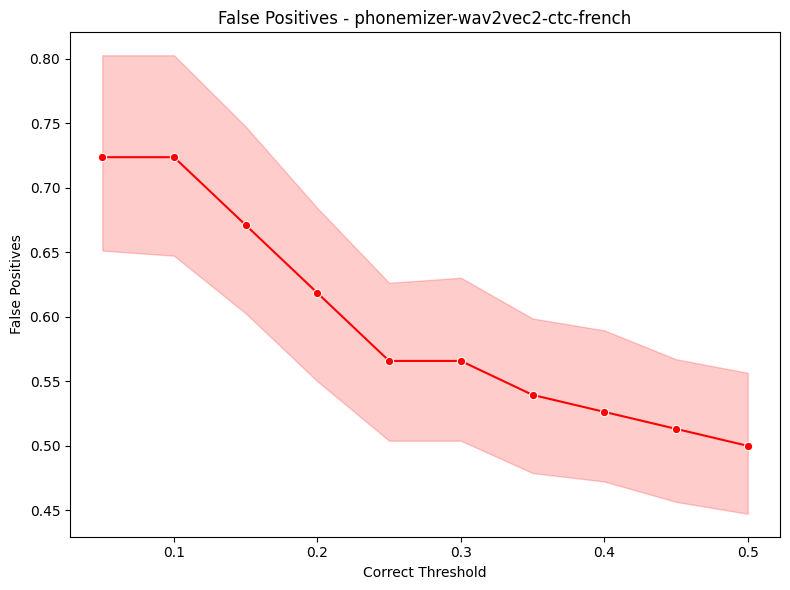

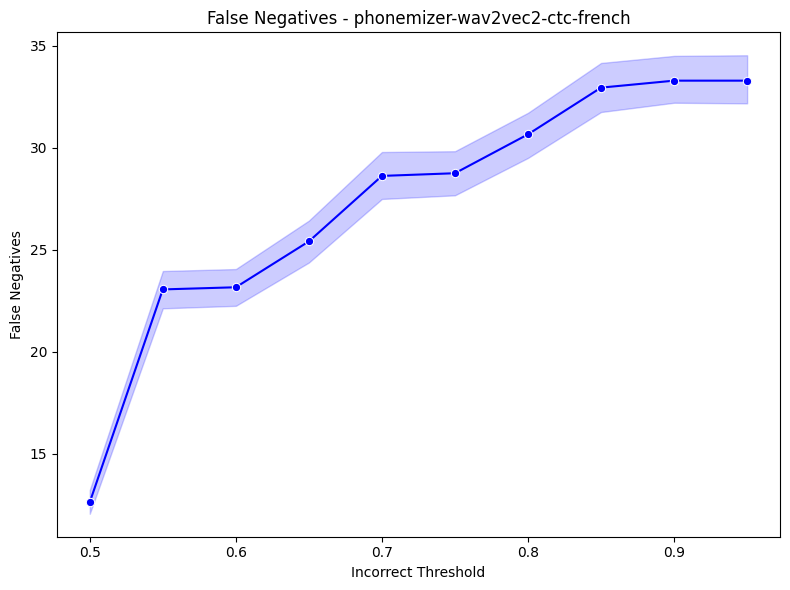

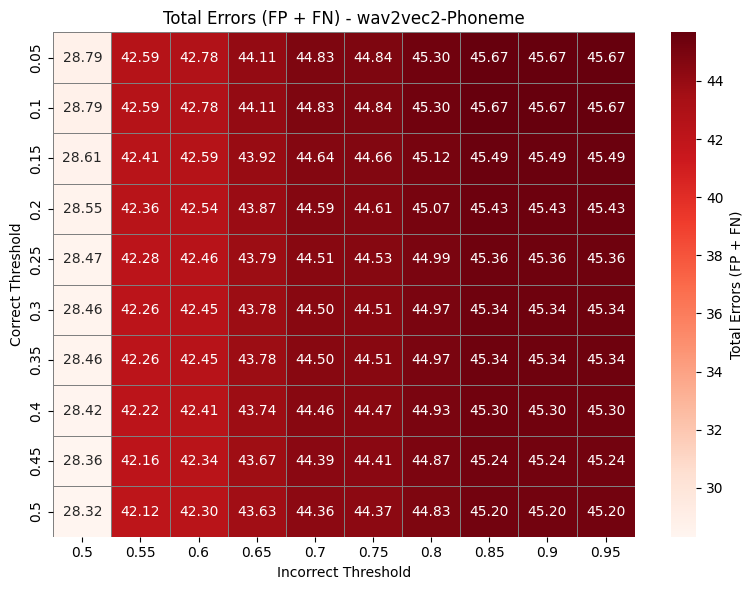

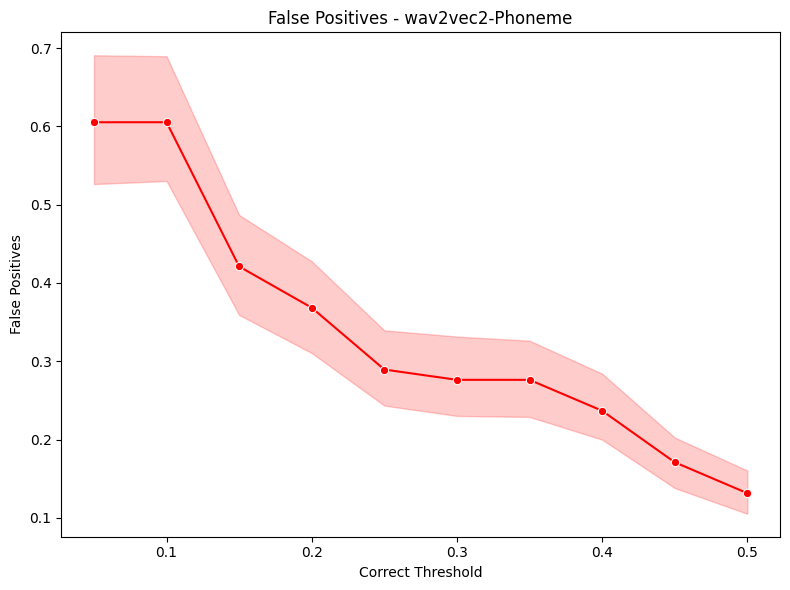

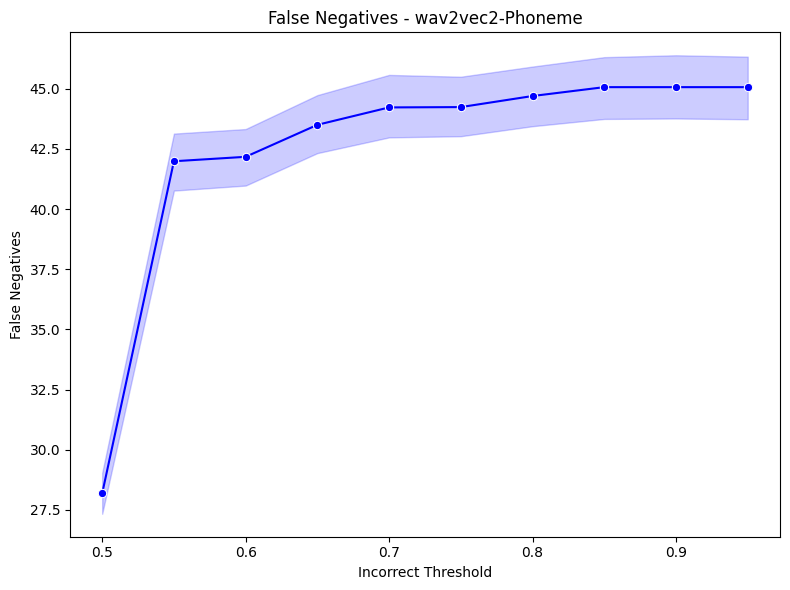

In [16]:
for model in models:
    # We filter the DataFrame for the current model before plotting the FP and FN statistics
    model_df = all_eval_df[all_eval_df['model'] == model]
    plot_FP_FN_stats(model_df, model)

In [17]:
# Group by model and compute the mean of the total error
mean_errors_by_model = all_eval_df.copy().groupby('model')['total_error'].mean().reset_index()

# Display the result
print(mean_errors_by_model)

                            model  total_error
0  phonemizer-wav2vec2-ctc-french    27.773684
1                wav2vec2-Phoneme    42.757895
2      wav2vec2-french-phonemizer    24.482895


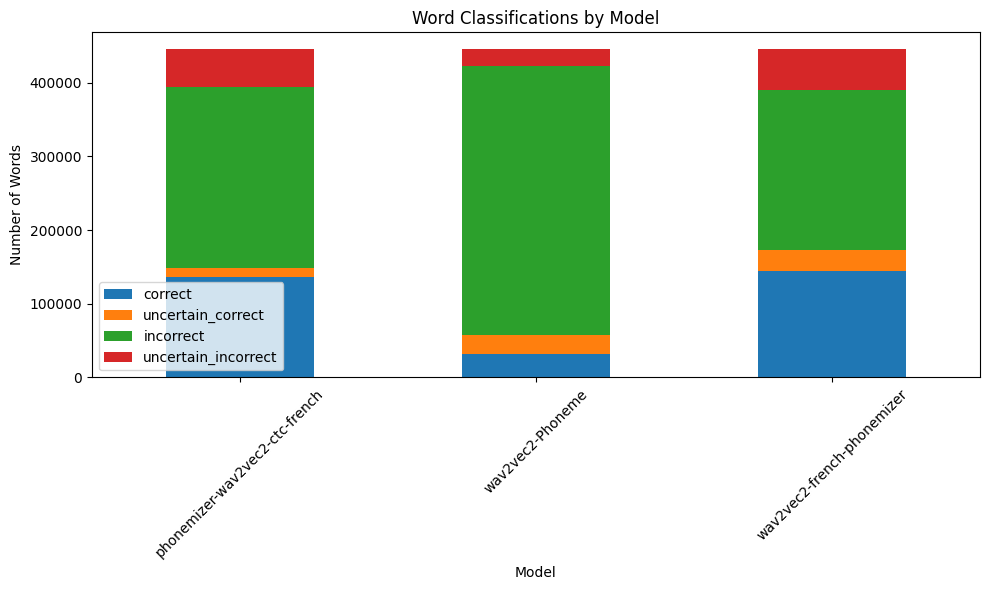

In [18]:
plot_word_classification(all_eval_df)

In [19]:
all_eval_df.head()

,test_id,model,correct_threshold,incorrect_threshold,false_pos,false_neg,word_results,total_error,classification_counts
0,79055215-1979-42D3-9B26-B9C6DD935D83,wav2vec2-french-phonemizer,0.05,0.5,2,7,"[(sɛ, correct, 88), (listwaʁ, uncertain_incorr...",9,"{'correct': 50, 'uncertain_correct': 0, 'incor..."
1,3D4319B1-C861-4DB8-8EFF-BDB93392C1D3,wav2vec2-french-phonemizer,0.05,0.5,1,6,"[(sɛ, incorrect, None), (listwaʁ, uncertain_in...",7,"{'correct': 20, 'uncertain_correct': 0, 'incor..."
2,B73F92E3-A032-43FF-B027-9954267C6298,wav2vec2-french-phonemizer,0.05,0.5,0,13,"[(sɛ, uncertain_incorrect, 323), (listwaʁ, unc...",13,"{'correct': 5, 'uncertain_correct': 0, 'incorr..."
3,99EB8804-8099-428C-864B-A0E89012F3AA,wav2vec2-french-phonemizer,0.05,0.5,1,6,"[(sɛ, incorrect, None), (listwaʁ, uncertain_in...",7,"{'correct': 24, 'uncertain_correct': 0, 'incor..."
4,8EFA264B-8CFC-4CDD-B910-F07C4FCB2B66,wav2vec2-french-phonemizer,0.05,0.5,3,11,"[(sɛ, uncertain_incorrect, 1587), (listwaʁ, co...",14,"{'correct': 18, 'uncertain_correct': 0, 'incor..."


                                test_id                       model  \
0  79055215-1979-42D3-9B26-B9C6DD935D83  wav2vec2-french-phonemizer   
1  3D4319B1-C861-4DB8-8EFF-BDB93392C1D3  wav2vec2-french-phonemizer   
2  B73F92E3-A032-43FF-B027-9954267C6298  wav2vec2-french-phonemizer   
3  99EB8804-8099-428C-864B-A0E89012F3AA  wav2vec2-french-phonemizer   
4  8EFA264B-8CFC-4CDD-B910-F07C4FCB2B66  wav2vec2-french-phonemizer   

   correct_threshold  incorrect_threshold false_pos false_neg  \
0               0.05                  0.5         2         7   
1               0.05                  0.5         1         6   
2               0.05                  0.5         0        13   
3               0.05                  0.5         1         6   
4               0.05                  0.5         3        11   

                                        word_results total_error  \
0  [(sɛ, correct, 88), (listwaʁ, uncertain_incorr...           9   
1  [(sɛ, incorrect, None), (listwaʁ, uncertain

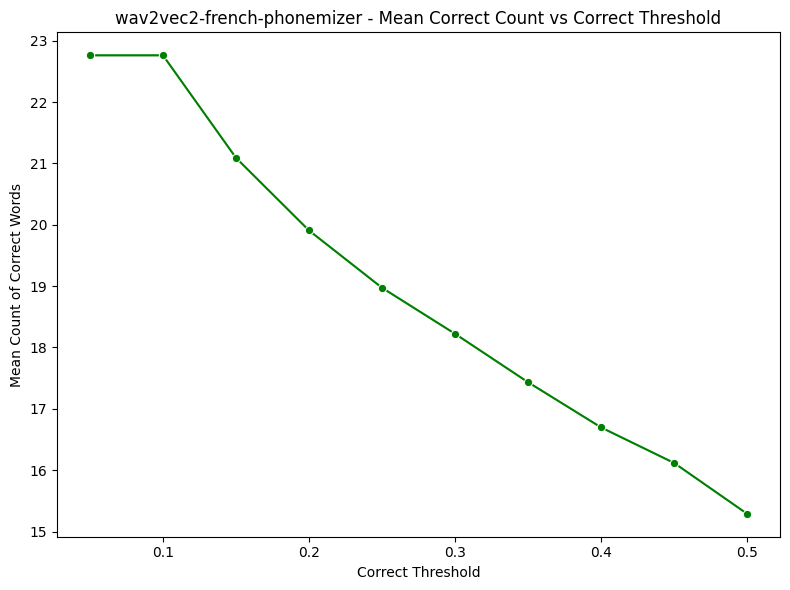

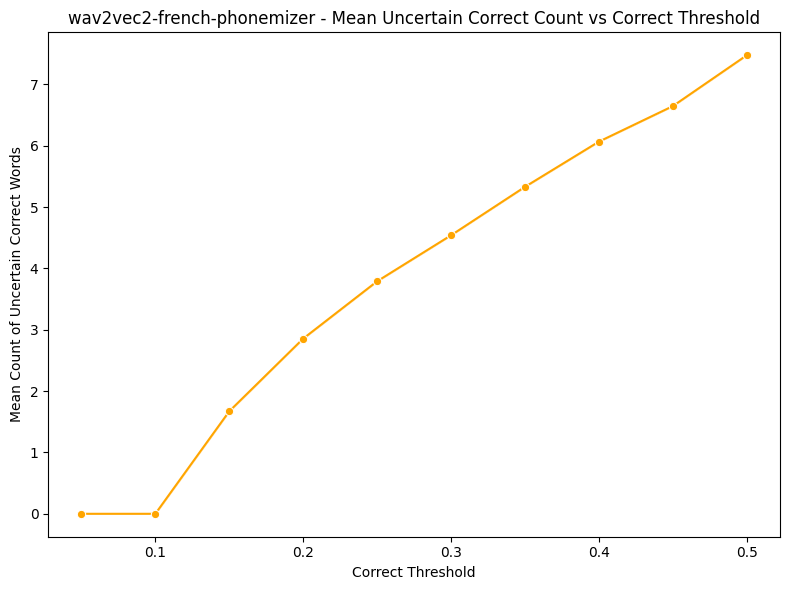

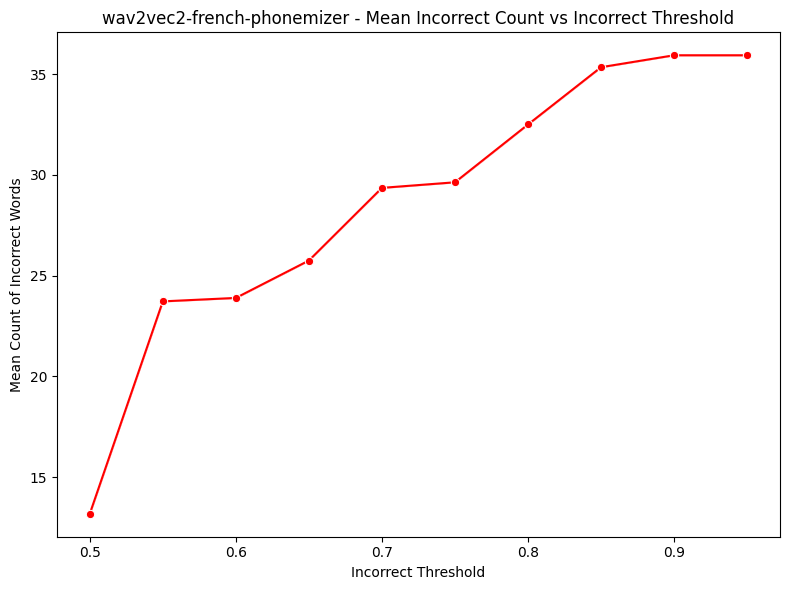

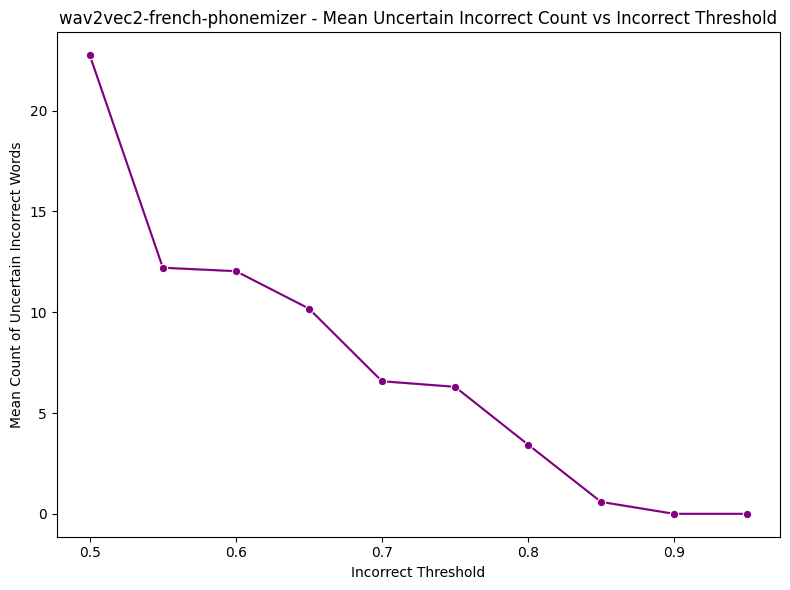

                                   test_id                           model  \
7600  79055215-1979-42D3-9B26-B9C6DD935D83  phonemizer-wav2vec2-ctc-french   
7601  3D4319B1-C861-4DB8-8EFF-BDB93392C1D3  phonemizer-wav2vec2-ctc-french   
7602  B73F92E3-A032-43FF-B027-9954267C6298  phonemizer-wav2vec2-ctc-french   
7603  99EB8804-8099-428C-864B-A0E89012F3AA  phonemizer-wav2vec2-ctc-french   
7604  8EFA264B-8CFC-4CDD-B910-F07C4FCB2B66  phonemizer-wav2vec2-ctc-french   

      correct_threshold  incorrect_threshold false_pos false_neg  \
7600               0.05                  0.5         1        22   
7601               0.05                  0.5         0        10   
7602               0.05                  0.5         0        13   
7603               0.05                  0.5         1         8   
7604               0.05                  0.5         2         3   

                                           word_results total_error  \
7600  [(sɛ, correct, 90), (listwaʁ, uncertain_incor

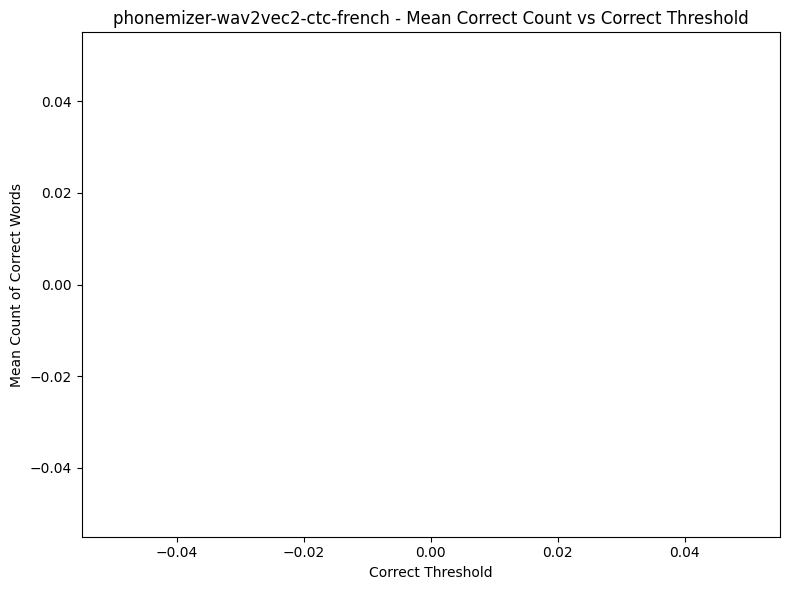

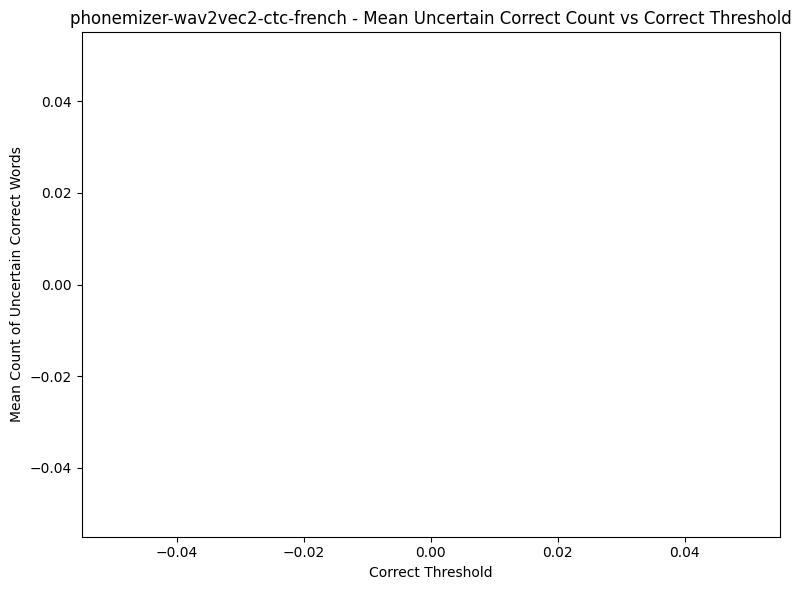

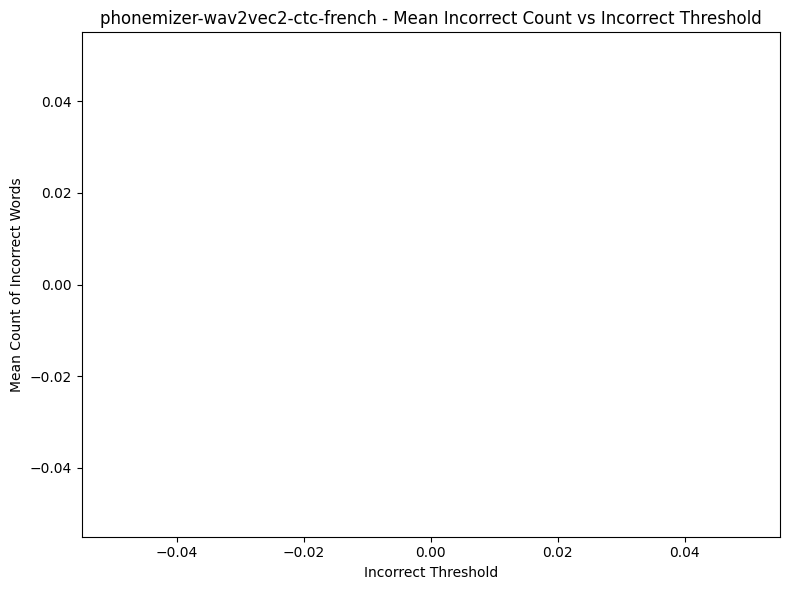

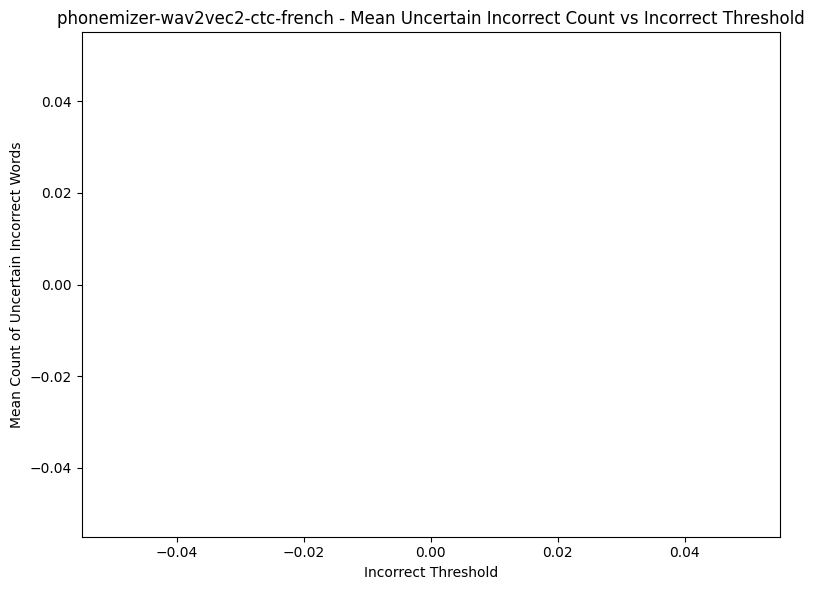

                                    test_id             model  \
15200  79055215-1979-42D3-9B26-B9C6DD935D83  wav2vec2-Phoneme   
15201  3D4319B1-C861-4DB8-8EFF-BDB93392C1D3  wav2vec2-Phoneme   
15202  B73F92E3-A032-43FF-B027-9954267C6298  wav2vec2-Phoneme   
15203  99EB8804-8099-428C-864B-A0E89012F3AA  wav2vec2-Phoneme   
15204  8EFA264B-8CFC-4CDD-B910-F07C4FCB2B66  wav2vec2-Phoneme   

       correct_threshold  incorrect_threshold false_pos false_neg  \
15200               0.05                  0.5         0        41   
15201               0.05                  0.5         0        16   
15202               0.05                  0.5         0        16   
15203               0.05                  0.5         3        19   
15204               0.05                  0.5         0        25   

                                            word_results total_error  \
15200  [(sɛ, incorrect, None), (listwaʁ, incorrect, N...          41   
15201  [(sɛ, incorrect, None), (listwaʁ, uncertain

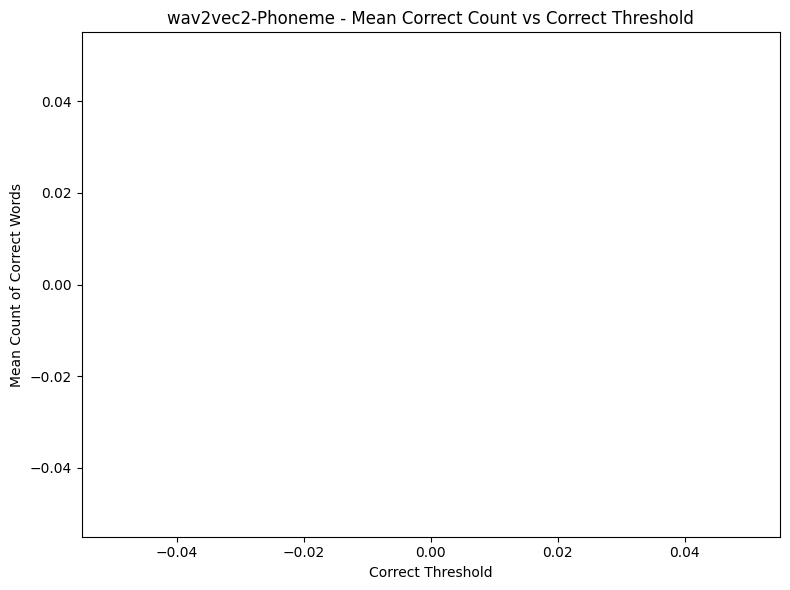

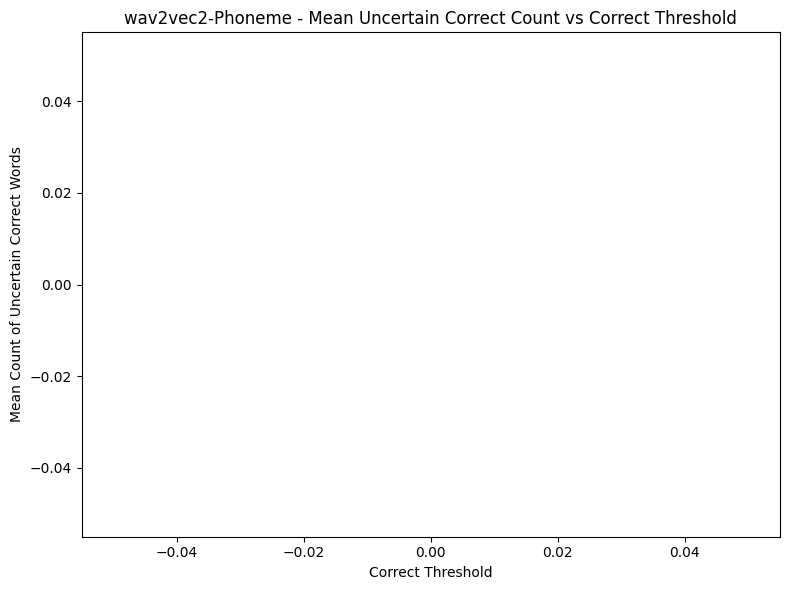

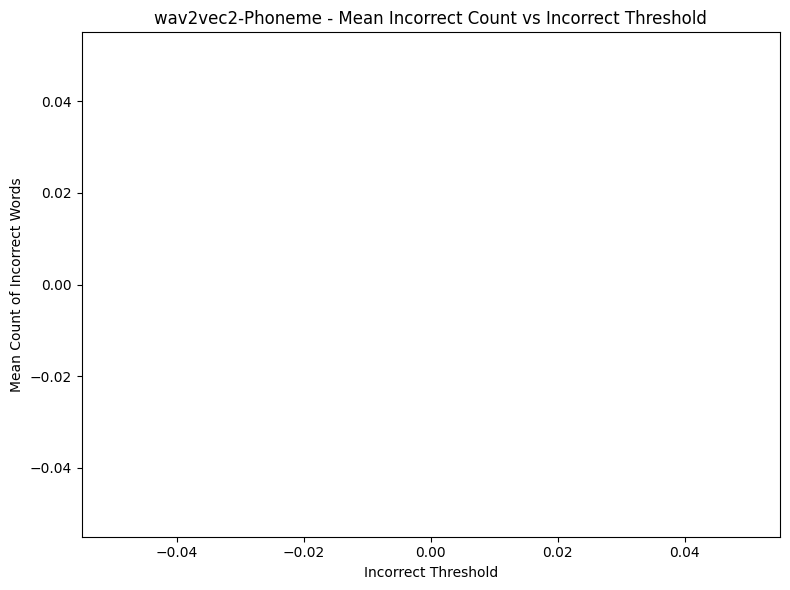

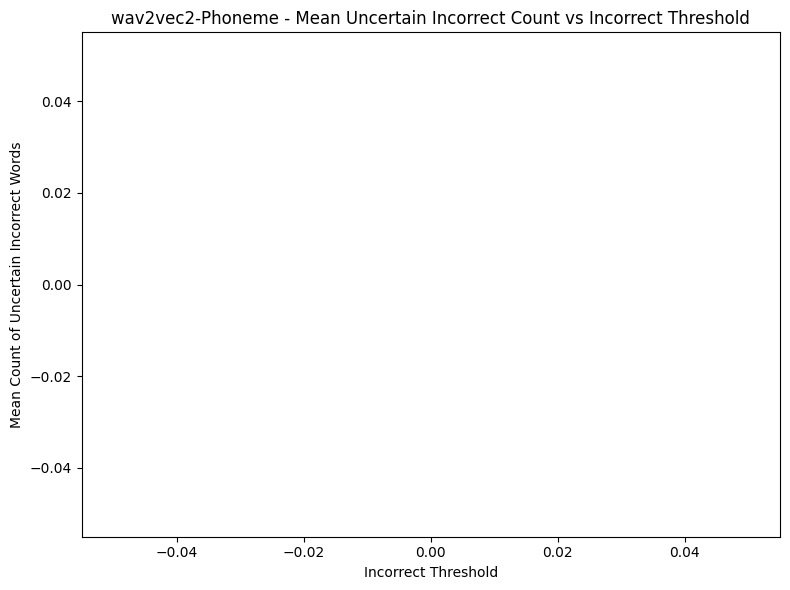

In [20]:
for model in models:
    # We filter the DataFrame for the current model before plotting the FP and FN statistics
    model_df = all_eval_df[all_eval_df['model'] == model]
    print(model_df.head())
    plot_word_classification_trends(model_df, model)

/Users/cleo/EPFL/Ma2/Project/Rhythmico-ASR/src/evaluation_stats.py:154: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = results_df.pivot('correct_threshold', 'incorrect_threshold', metric)
/Users/cleo/EPFL/Ma2/Project/Rhythmico-ASR/src/evaluation_stats.py:154: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = results_df.pivot('correct_threshold', 'incorrect_threshold', metric)
/Users/cleo/EPFL/Ma2/Project/Rhythmico-ASR/src/evaluation_stats.py:154: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = results_df.pivot('correct_threshold', 'incorrect_threshold', metric)


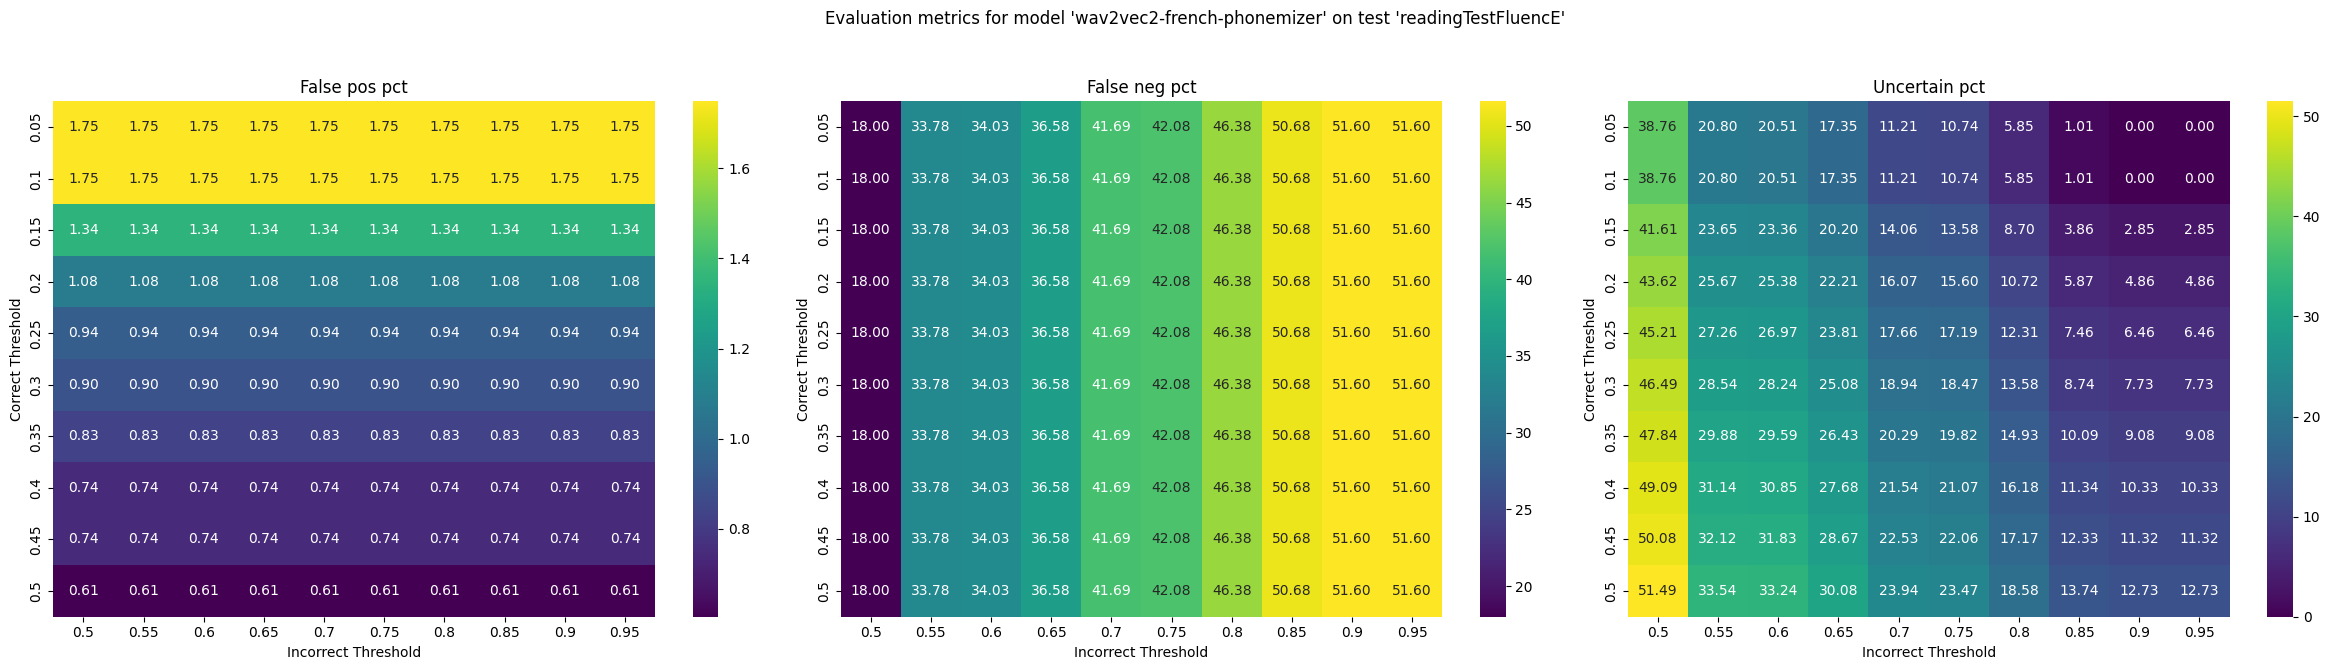

✅ Best threshold combination:
  - correct_threshold: 0.25
  - incorrect_threshold: 0.5
  - False Positives: 0.94%
  - False Negatives: 18.00%
  - Uncertain: 45.21%
  - Composite Score: -0.1265


/Users/cleo/EPFL/Ma2/Project/Rhythmico-ASR/src/evaluation_stats.py:154: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = results_df.pivot('correct_threshold', 'incorrect_threshold', metric)
/Users/cleo/EPFL/Ma2/Project/Rhythmico-ASR/src/evaluation_stats.py:154: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = results_df.pivot('correct_threshold', 'incorrect_threshold', metric)
/Users/cleo/EPFL/Ma2/Project/Rhythmico-ASR/src/evaluation_stats.py:154: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = results_df.pivot('correct_threshold', 'incorrect_threshold', metric)


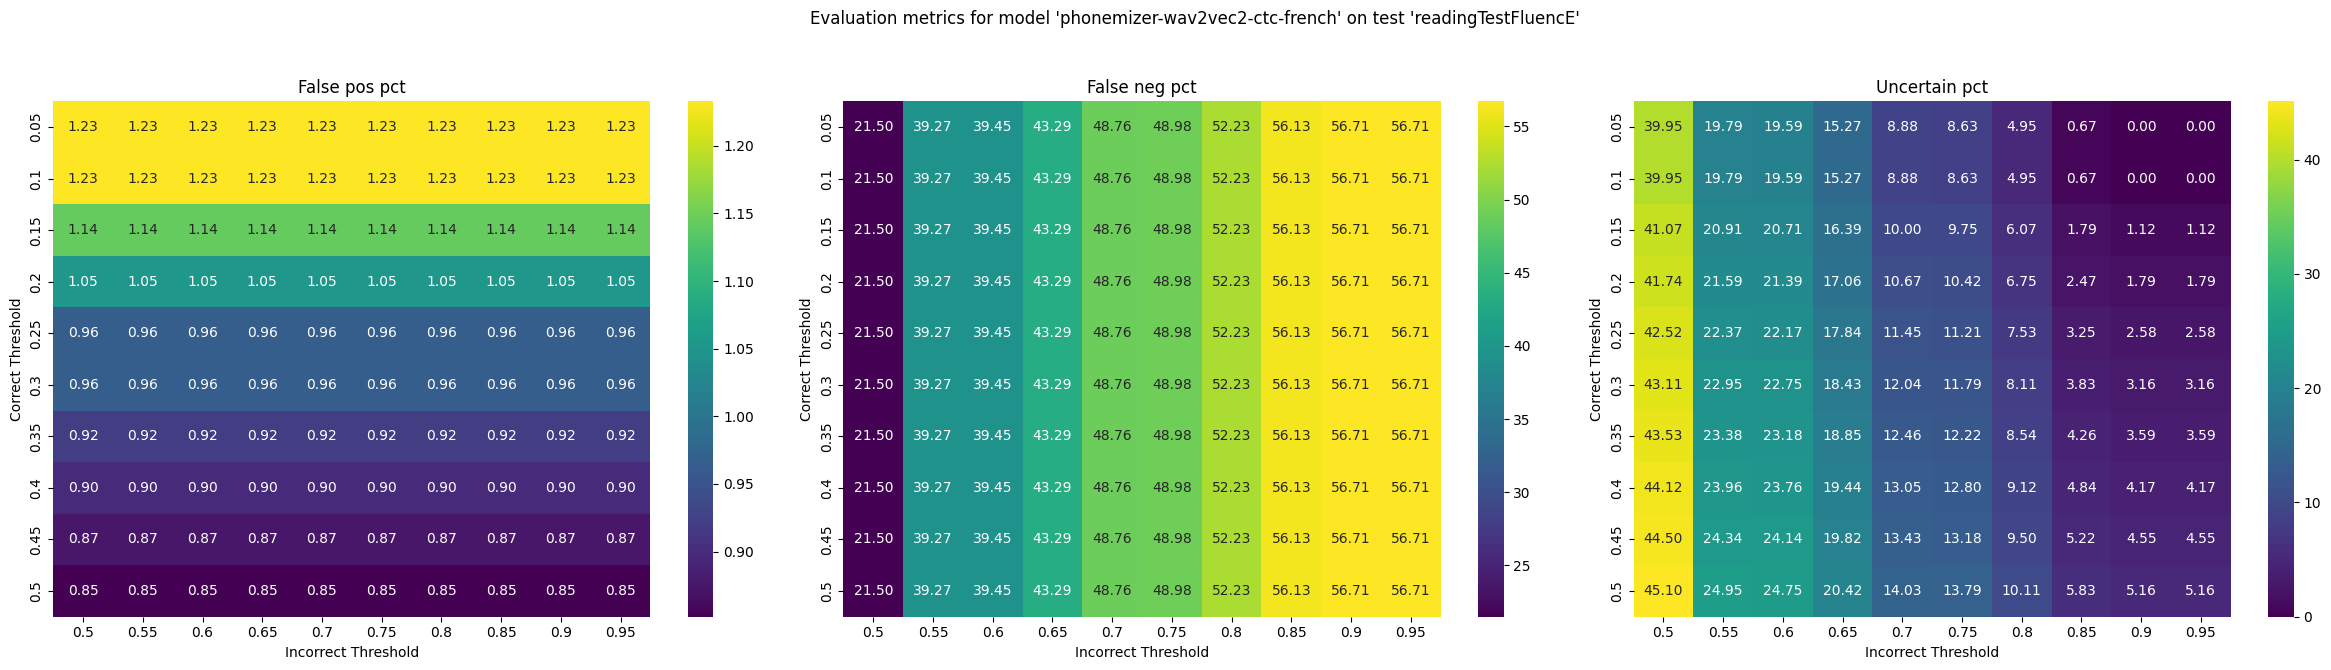

✅ Best threshold combination:
  - correct_threshold: 0.5
  - incorrect_threshold: 0.5
  - False Positives: 0.85%
  - False Negatives: 21.50%
  - Uncertain: 45.10%
  - Composite Score: -0.1600


/Users/cleo/EPFL/Ma2/Project/Rhythmico-ASR/src/evaluation_stats.py:154: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = results_df.pivot('correct_threshold', 'incorrect_threshold', metric)
/Users/cleo/EPFL/Ma2/Project/Rhythmico-ASR/src/evaluation_stats.py:154: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = results_df.pivot('correct_threshold', 'incorrect_threshold', metric)
/Users/cleo/EPFL/Ma2/Project/Rhythmico-ASR/src/evaluation_stats.py:154: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = results_df.pivot('correct_threshold', 'incorrect_threshold', metric)


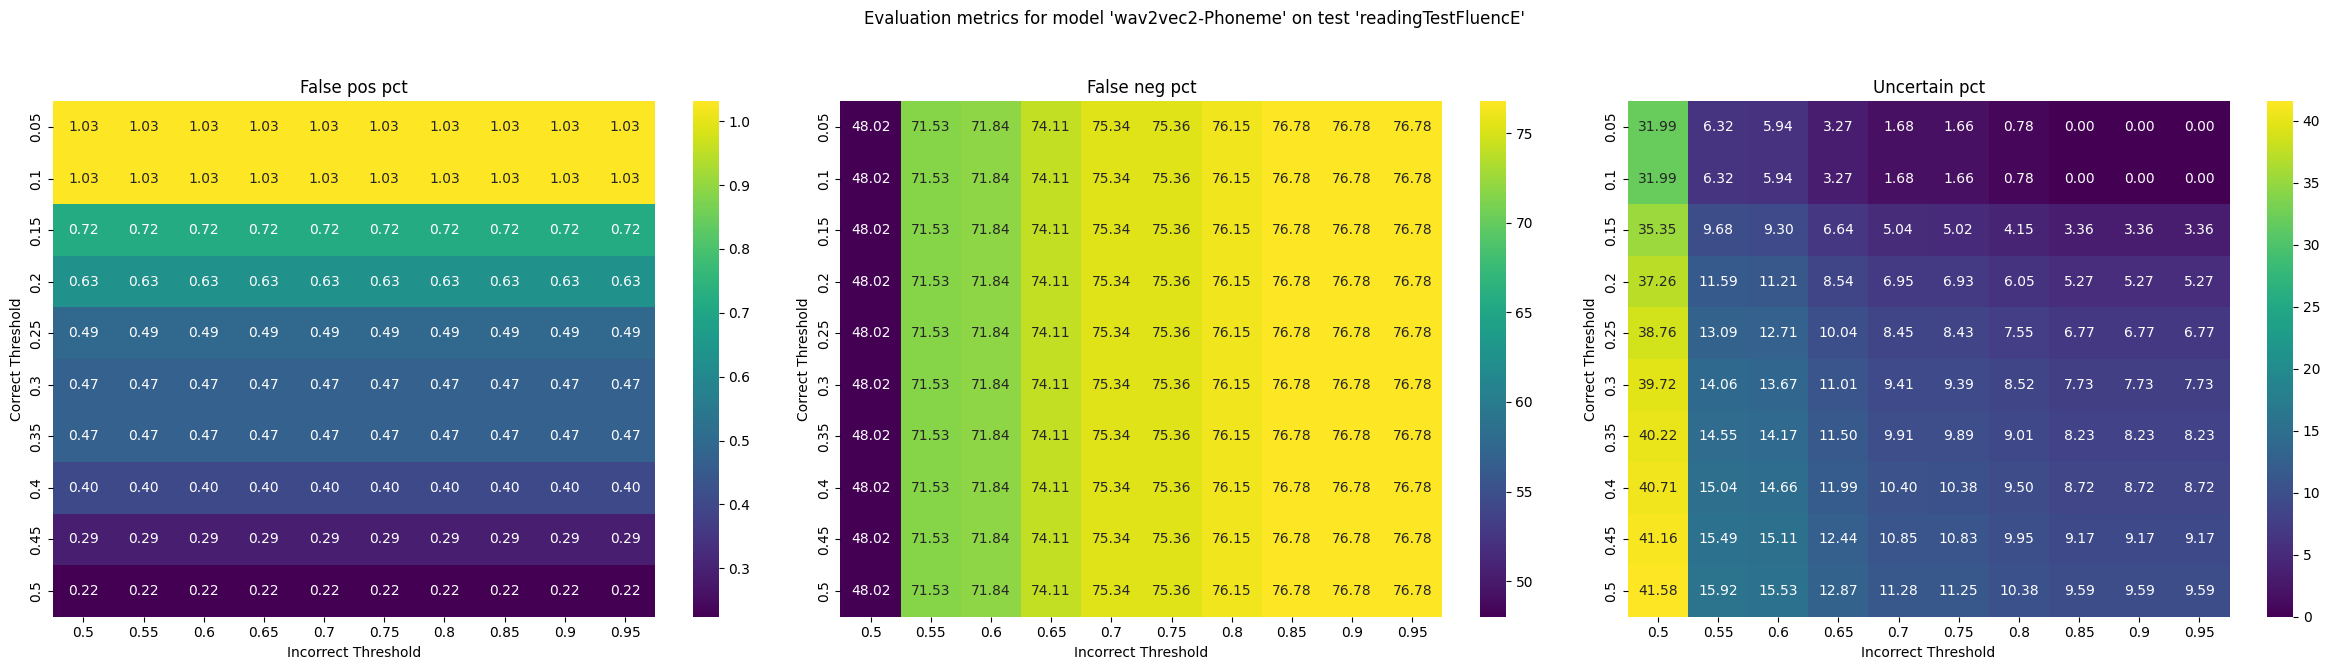

✅ Best threshold combination:
  - correct_threshold: 0.5
  - incorrect_threshold: 0.5
  - False Positives: 0.22%
  - False Negatives: 48.02%
  - Uncertain: 41.58%
  - Composite Score: -0.1930


In [21]:
# We initialize an empty DataFrame to accumulate all evaluation results
grid_eval_df = pd.DataFrame()

# We run the evaluation algorithm on the three models
for model in models:
    eval_df = evaluate_and_plot_thresholds(test_df=test_df, model=model, test_type='readingTestFluencE')
    find_best_threshold_combo(eval_df)
    grid_eval_df = pd.concat([grid_eval_df, eval_df], ignore_index=True)

In [22]:
all_eval_df.head()

,test_id,model,correct_threshold,incorrect_threshold,false_pos,false_neg,word_results,total_error,classification_counts
0,79055215-1979-42D3-9B26-B9C6DD935D83,wav2vec2-french-phonemizer,0.05,0.5,2,7,"[(sɛ, correct, 88), (listwaʁ, uncertain_incorr...",9,"{'correct': 50, 'uncertain_correct': 0, 'incor..."
1,3D4319B1-C861-4DB8-8EFF-BDB93392C1D3,wav2vec2-french-phonemizer,0.05,0.5,1,6,"[(sɛ, incorrect, None), (listwaʁ, uncertain_in...",7,"{'correct': 20, 'uncertain_correct': 0, 'incor..."
2,B73F92E3-A032-43FF-B027-9954267C6298,wav2vec2-french-phonemizer,0.05,0.5,0,13,"[(sɛ, uncertain_incorrect, 323), (listwaʁ, unc...",13,"{'correct': 5, 'uncertain_correct': 0, 'incorr..."
3,99EB8804-8099-428C-864B-A0E89012F3AA,wav2vec2-french-phonemizer,0.05,0.5,1,6,"[(sɛ, incorrect, None), (listwaʁ, uncertain_in...",7,"{'correct': 24, 'uncertain_correct': 0, 'incor..."
4,8EFA264B-8CFC-4CDD-B910-F07C4FCB2B66,wav2vec2-french-phonemizer,0.05,0.5,3,11,"[(sɛ, uncertain_incorrect, 1587), (listwaʁ, co...",14,"{'correct': 18, 'uncertain_correct': 0, 'incor..."
